<AxesSubplot:>

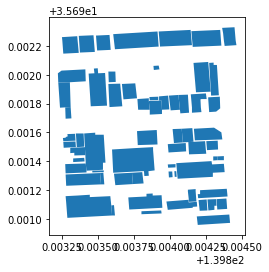

In [4]:

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import pybdshadow
MAPBOX_ACCESS_TOKEN = "pk.eyJ1IjoibmkxbzEiLCJhIjoiY2t3ZDgzMmR5NDF4czJ1cm84Z3NqOGt3OSJ9.yOYP6pxDzXzhbHfyk3uORg"
bounds = [139.803137,35.690984,139.804437,35.692684]
buildings_gdf = pybdshadow.get_buildings_by_bounds(139.804337,35.692584,139.804437,35.692684,MAPBOX_ACCESS_TOKEN)


buildings_gdf['x'] = buildings_gdf.centroid.x
buildings_gdf['y'] = buildings_gdf.centroid.y
buildings_gdf = buildings_gdf[(buildings_gdf['x'] > bounds[0]) &
                      (buildings_gdf['x'] <  bounds[2]) &
                      (buildings_gdf['y'] >  bounds[1]) &
                      (buildings_gdf['y'] <  bounds[3])]
buildings_gdf.plot()

In [ ]:
buildings_gdf.crs

In [5]:
precision = 3600
date = '2022-01-01'
wallsunshine = pybdshadow.cal_sunshine_facade(buildings_gdf, date, precision)


floorsunshine = pybdshadow.cal_sunshine(buildings_gdf,
                                   day=date,
                                   roof=False,
                                   accuracy='vector',
                                   precision=precision)
floorsunshine['height'] = 0

roofsunshine = pybdshadow.cal_sunshine(buildings_gdf,
                                   day=date,
                                   roof=True,
                                   accuracy='vector',
                                   precision=precision
                                   )

ValueError: Must pass either crs or epsg.

In [15]:

# 生成立体建筑物
plane_sunshine = pd.concat([floorsunshine,roofsunshine],axis=0)

plane_sunshine['geometry'] = plane_sunshine.apply(lambda x: pybdshadow.extrude_poly(x['geometry'],x['height']),axis=1)

final_shadows_sunshinetime = pd.concat([plane_sunshine,wallsunshine],axis=0)

vis = pybdshadow.show_sunshine(sunshine = final_shadows_sunshinetime,
                  zoom='auto',vis_height = 1000)
vis

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o4', 'type': '…